In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "gpu.csv"
gpu_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
gpu_df.head()

,Relative Time (Process),system/gpu.0.gpu,system/gpu.0.gpu__MIN,system/gpu.0.gpu__MAX,system/gpu.1.gpu,system/gpu.1.gpu__MIN,system/gpu.1.gpu__MAX,system/gpu.2.gpu,system/gpu.2.gpu__MIN,system/gpu.2.gpu__MAX,...,system/gpu.4.gpu__MAX,system/gpu.5.gpu,system/gpu.5.gpu__MIN,system/gpu.5.gpu__MAX,system/gpu.6.gpu,system/gpu.6.gpu__MIN,system/gpu.6.gpu__MAX,system/gpu.7.gpu,system/gpu.7.gpu__MIN,system/gpu.7.gpu__MAX
0,16.685908,0,0,0,0,0,0,0,0,0,...,92,0,0,0,74,74,74,95,95,95
1,31.685567,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
2,46.686399,0,0,0,0,0,0,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,61.694096,100,100,100,99,99,99,99,99,99,...,100,98,98,98,100,100,100,100,100,100
4,76.707428,100,100,100,100,100,100,99,99,99,...,100,99,99,99,100,100,100,100,100,100


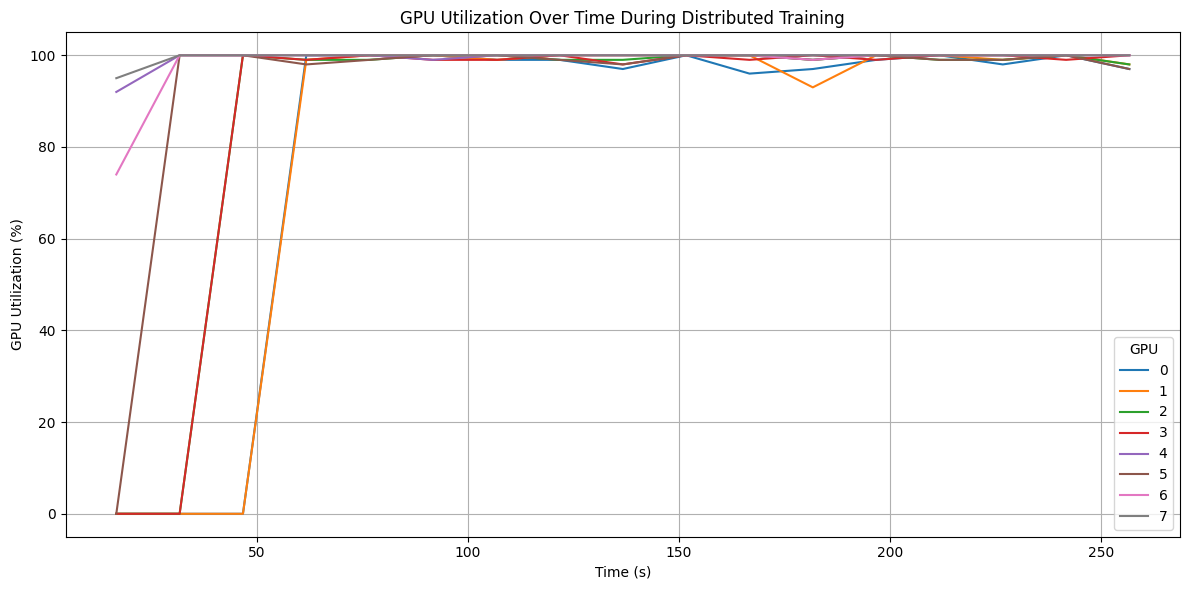

In [2]:
import matplotlib.pyplot as plt

# Extract time and GPU utilization columns
time = gpu_df['Relative Time (Process)']
gpu_util_cols = [col for col in gpu_df.columns if col.endswith('.gpu') and '__' not in col]

# Plot GPU utilization
plt.figure(figsize=(12, 6))
for col in gpu_util_cols:
    plt.plot(time, gpu_df[col], label=col.split('.')[-2])  # gpu.0, gpu.1, etc.

plt.xlabel('Time (s)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Utilization Over Time During Distributed Training')
plt.legend(title='GPU')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Load the uploaded memory usage CSV
memory_path = "memory.csv"
memory_df = pd.read_csv(memory_path)

# Display first few rows to understand its structure
memory_df.head()


,Relative Time (Process),different-plant-76 - system/gpu.0.memory,different-plant-76 - system/gpu.0.memory__MIN,different-plant-76 - system/gpu.0.memory__MAX,different-plant-76 - system/gpu.1.memory,different-plant-76 - system/gpu.1.memory__MIN,different-plant-76 - system/gpu.1.memory__MAX,different-plant-76 - system/gpu.2.memory,different-plant-76 - system/gpu.2.memory__MIN,different-plant-76 - system/gpu.2.memory__MAX,...,different-plant-76 - system/gpu.4.memory__MAX,different-plant-76 - system/gpu.5.memory,different-plant-76 - system/gpu.5.memory__MIN,different-plant-76 - system/gpu.5.memory__MAX,different-plant-76 - system/gpu.6.memory,different-plant-76 - system/gpu.6.memory__MIN,different-plant-76 - system/gpu.6.memory__MAX,different-plant-76 - system/gpu.7.memory,different-plant-76 - system/gpu.7.memory__MIN,different-plant-76 - system/gpu.7.memory__MAX
0,16.685908,0,0,0,0,0,0,0,0,0,...,19,0,0,0,48,48,48,51,51,51
1,31.685567,0,0,0,0,0,0,0,0,0,...,15,0,0,0,37,37,37,39,39,39
2,46.686399,0,0,0,0,0,0,0,0,0,...,9,0,0,0,24,24,24,39,39,39
3,61.694096,0,0,0,2,2,2,26,26,26,...,29,19,19,19,35,35,35,58,58,58
4,76.707428,0,0,0,0,0,0,14,14,14,...,22,15,15,15,57,57,57,51,51,51


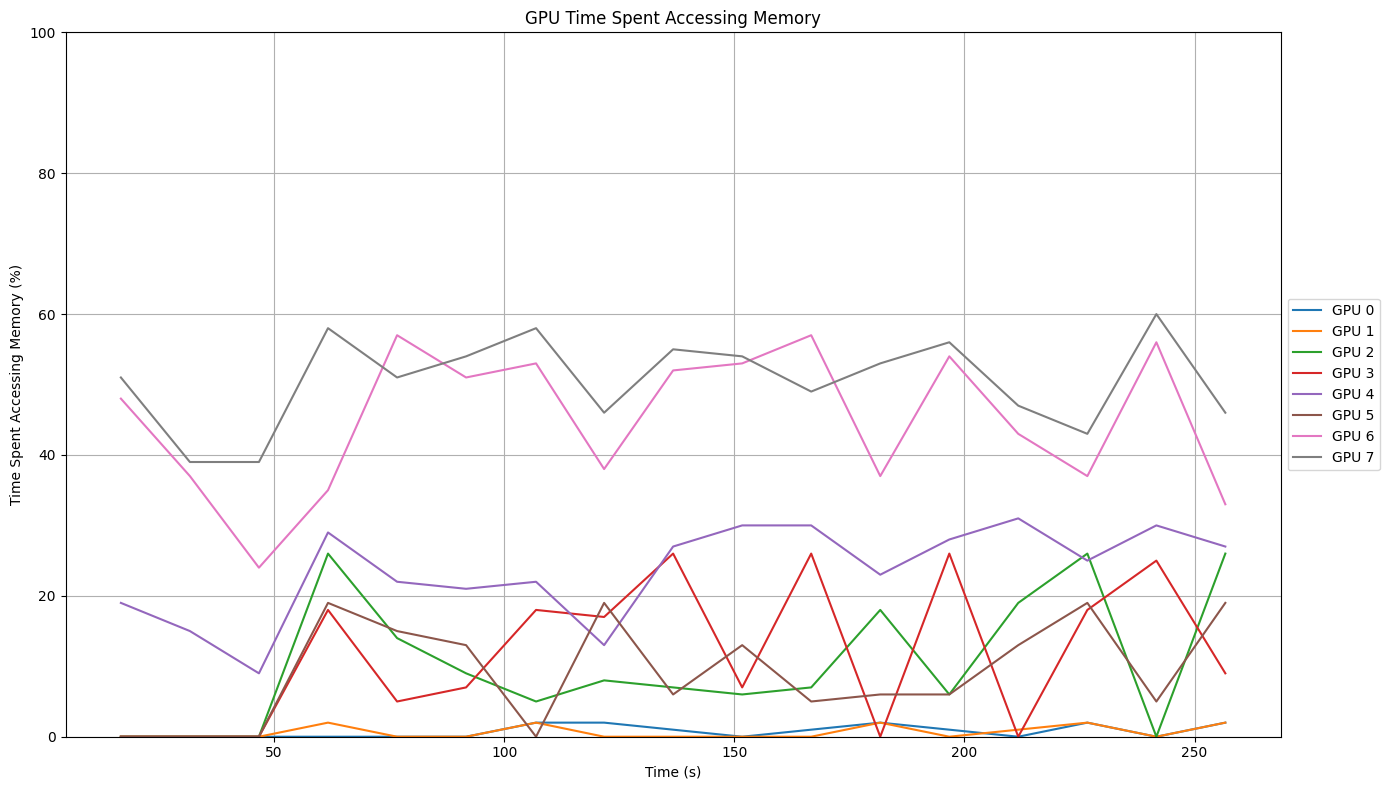

In [10]:
# Extract memory columns
time_mem = memory_df['Relative Time (Process)']
memory_main_cols = [col for col in memory_df.columns if col.endswith('.memory') and '__' not in col]
memory_min_cols = [col for col in memory_df.columns if col.endswith('__MIN')]
memory_max_cols = [col for col in memory_df.columns if col.endswith('__MAX')]

# Plot memory usage
plt.figure(figsize=(14, 8))

for col in memory_main_cols:
    gpu_id = col.split('.')[1]
    plt.plot(time_mem, memory_df[col], label=f'GPU {gpu_id}')


plt.xlabel('Time (s)')
plt.ylim(0, 100)
plt.ylabel('Time Spent Accessing Memory (%)')
plt.title('GPU Time Spent Accessing Memory')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

